In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix, parallel_coordinates
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.express as px
from sklearn.metrics import classification_report, accuracy_score


## Data Processing

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
data = pd.read_csv(url, names=columns, sep=",\s*", engine='python', na_values="?")

<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/2812567494.py:5: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv(url, names=columns, sep=",\s*", engine='python', na_values="?")


In [3]:
data.drop(columns=['fnlwgt'], inplace=True)
data.replace(' ?', np.nan, inplace=True)
for column in data.columns:
    most_frequent = data[column].mode()[0]
    data[column].fillna(most_frequent, inplace=True)
    
categorical_columns = ["workclass", "education", "marital-status", "occupation", 
                       "relationship", "race", "sex", "native-country", "income"]
data[categorical_columns] = data[categorical_columns].apply(lambda x: x.astype('category'))

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/328728926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(most_frequent, inplace=True)
/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/328728926.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  category
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   capital-gain    32561 non-null  int64   
 10  capital-loss    32561 non-null  int64   
 11  hours-per-week  32561 non-null  int64   
 12  native-country  32561 non-null  category
 13  income          32561 non-null  category
dtypes: category(9), int64(5)
memory usage: 1.5 MB


In [5]:
categorical_cols = data.select_dtypes(include=['category', 'object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## User Story 1: Infuence of Age on Income

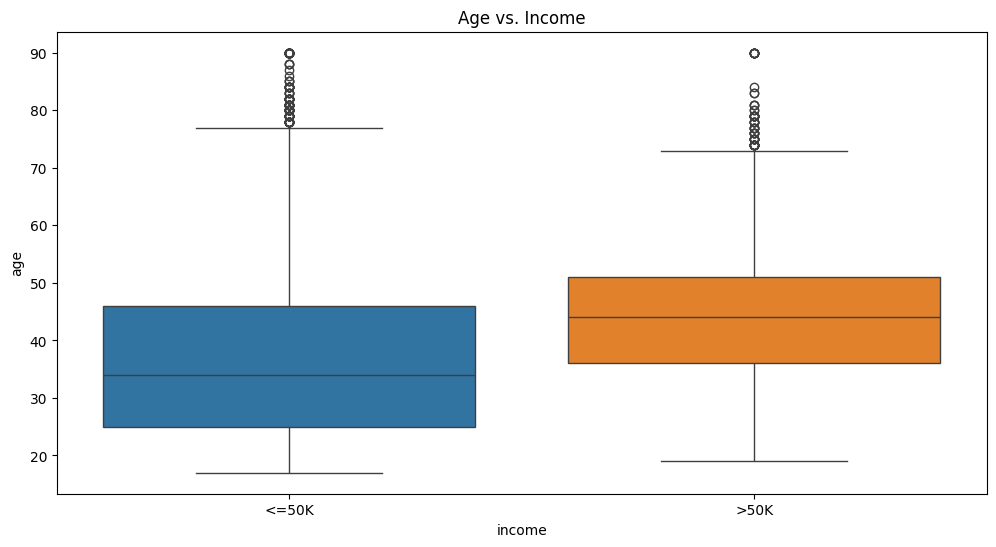

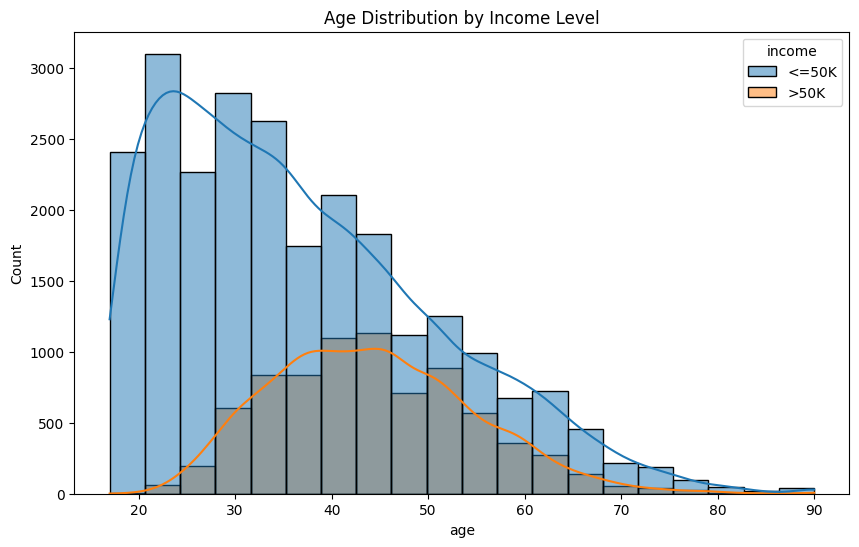

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='income', y='age',hue='income', data=data)
plt.title('Age vs. Income')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='income', bins=20, kde=True)
plt.title('Age Distribution by Income Level')
plt.show()


## User Story 2: Infuence of Education on Income

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/4284405325.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  education_income = data.groupby(['education-num', 'income']).size().unstack().fillna(0)


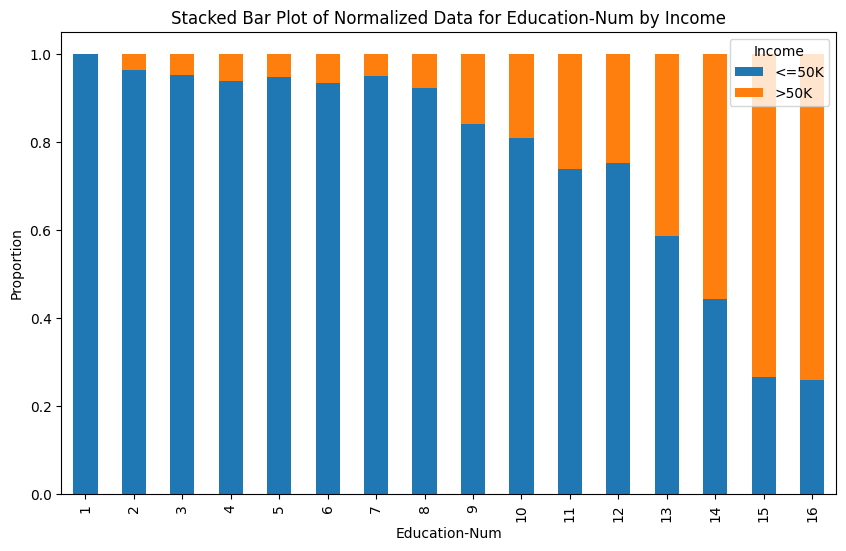

In [7]:
education_income = data.groupby(['education-num', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Normalized Data for Education-Num by Income')
plt.xlabel('Education-Num')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/2907259156.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mosaic_data['income'] = mosaic_data['income'].apply(lambda x: '>50K' if x == '>50K' else '<=50K')
/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/2907259156.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  edu_income_counts = mosaic_data.groupby(['education', 'income']).size().unstack(fill_value=0)


(16, 2)
['Doctorate', 'Prof-school', 'Masters', 'Bachelors', 'Assoc-voc', 'Assoc-acdm', 'Some-college', 'HS-grad', '12th', '10th', '7th-8th', '9th', '11th', '5th-6th', '1st-4th', 'Preschool']


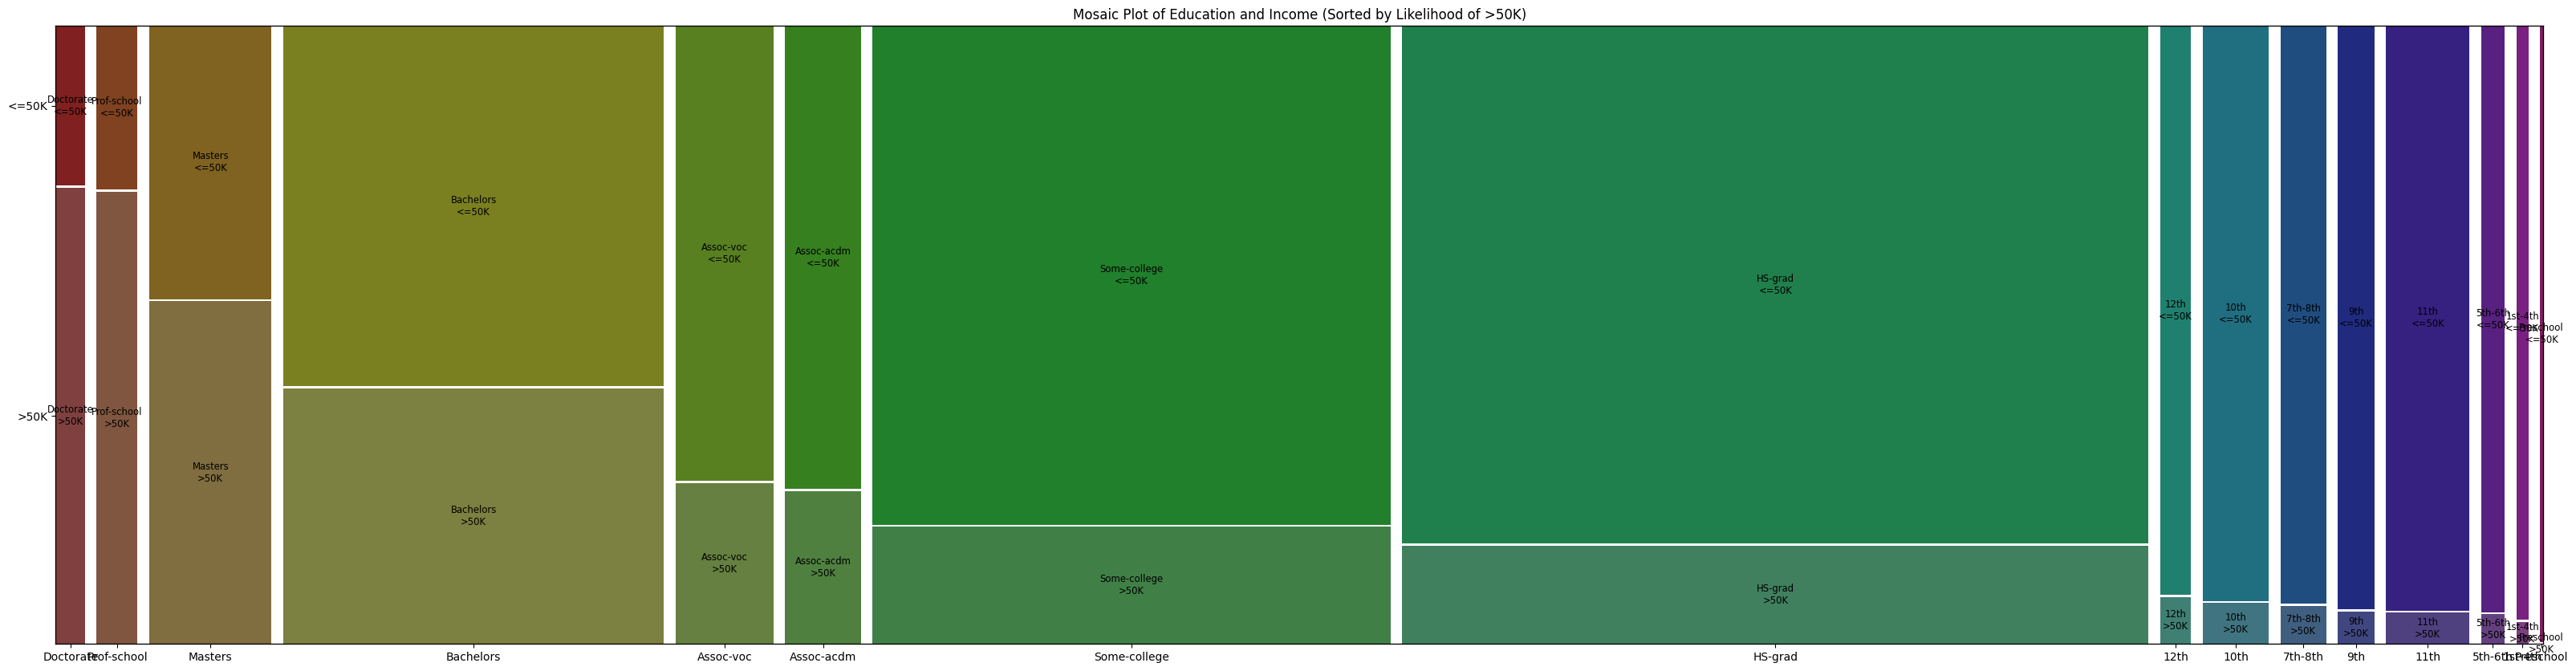

In [8]:
mosaic_data = data[['education', 'income']]
mosaic_data['income'] = mosaic_data['income'].apply(lambda x: '>50K' if x == '>50K' else '<=50K')

# Calculate the proportion of >50K income in each education level
edu_income_counts = mosaic_data.groupby(['education', 'income']).size().unstack(fill_value=0)
print(edu_income_counts.shape)


edu_income_counts['>50K_rate'] = edu_income_counts['>50K'] / edu_income_counts.sum(axis=1)
edu_income_counts_sorted = edu_income_counts.sort_values('>50K_rate', ascending=False)

# Create a sorted dictionary for the mosaic plot
sorted_education_order = edu_income_counts_sorted.index.tolist()
print(sorted_education_order)
mosaic_data_sorted = pd.DataFrame()

mosaic_dict = {}
for level in sorted_education_order:
    for income_level in ['>50K', '<=50K']:
        count = mosaic_data[(mosaic_data['education'] == level) & (mosaic_data['income'] == income_level)].shape[0]
        mosaic_dict[(level, income_level)] = count

# Plot the mosaic
fig, ax = plt.subplots(figsize=(40, 10))
vibgyor_colors = {
    'Violet': '#E6E6FA',    # Light Violet
    'Indigo': '#CCCCFF',    # Light Indigo
    'Blue': '#ADD8E6',      # Light Blue
    'Green': '#90EE90',     # Light Green
    'Yellow': '#FFFFE0',    # Light Yellow
    'Orange': '#FFDAB9',    # Light Orange
    'Red': '#FFCCCB'        # Light Red
}
mosaic(mosaic_dict, ax=ax, title='Mosaic Plot of Education and Income (Sorted by Likelihood of >50K)', properties=vibgyor_colors)
plt.show()

## User Story 3: Influence of Race and Sex on Income

In [9]:
px.parallel_categories(data,color=data['income'].apply(lambda x: 1 if x == '>50K' else 0), dimensions=['race','sex','income'],
                              color_continuous_midpoint=1)

## User Story 4: Influence of Relationship and Marital Status on Income

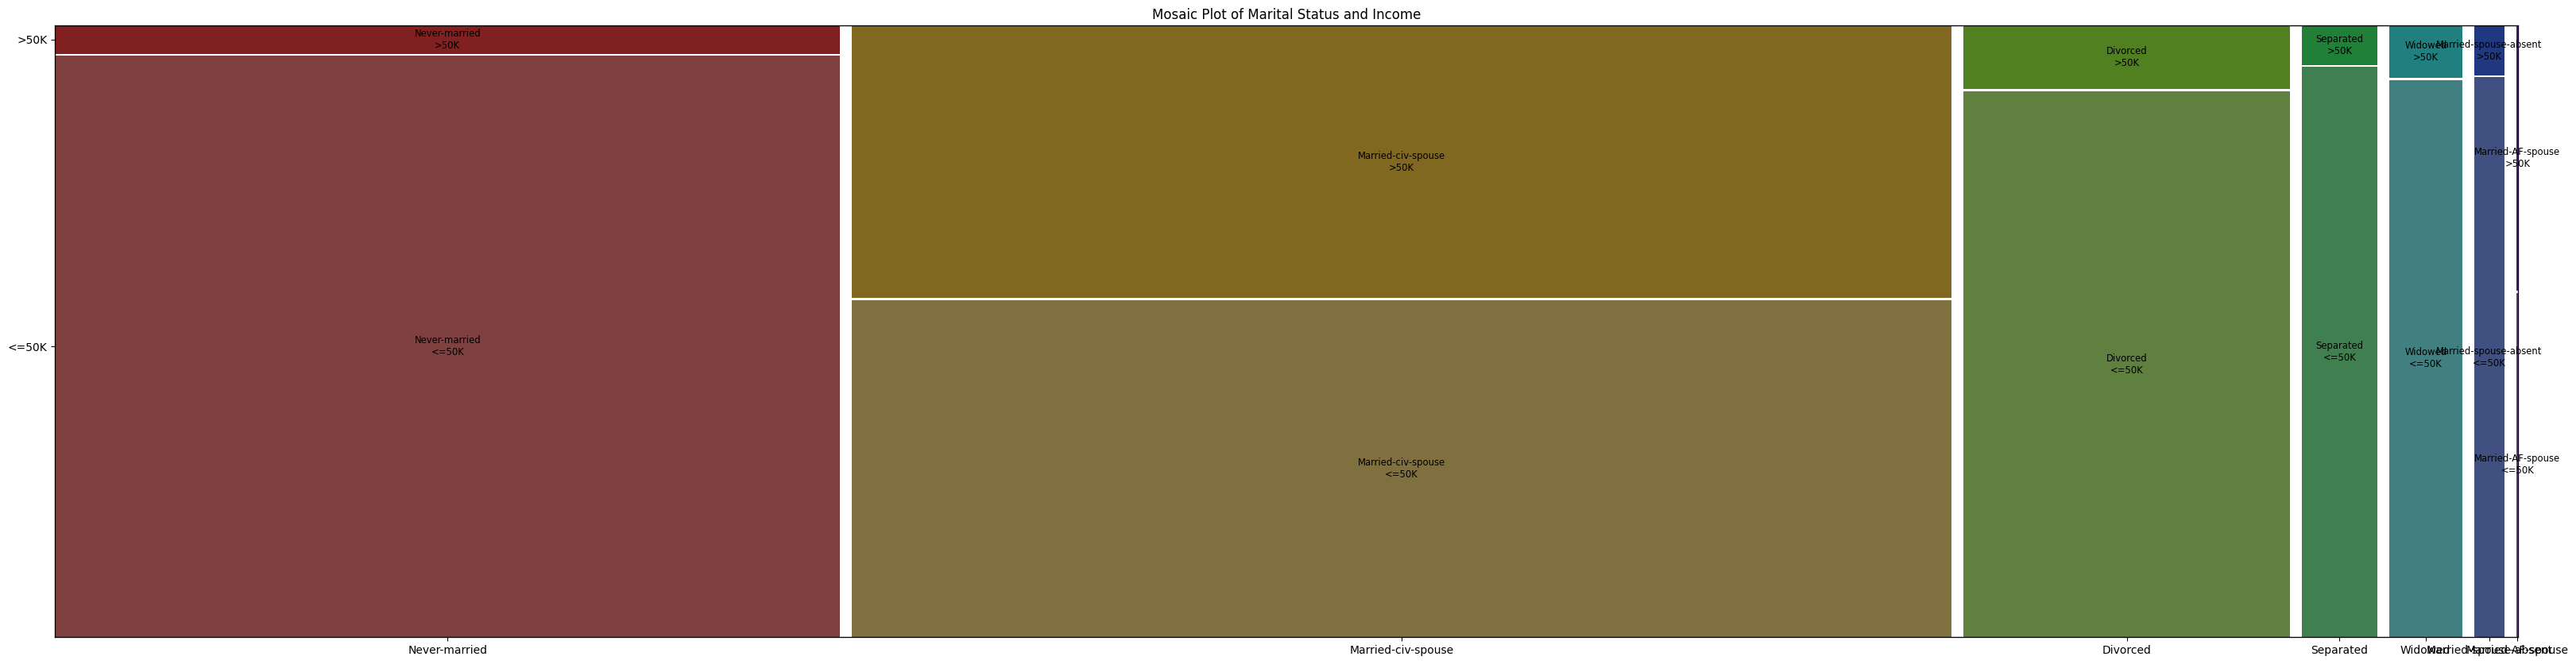

In [10]:
mosaic_data = data[['marital-status', 'income']]

# Convert to dictionary for mosaic plot
mosaic_dict = mosaic_data.apply(lambda x: tuple(x), axis=1).value_counts().to_dict()

# Plot the mosaic
fig, ax = plt.subplots(figsize=(40, 10))
mosaic(mosaic_dict, ax=ax, title='Mosaic Plot of Marital Status and Income')
plt.show()

In [11]:
px.parallel_categories(data,color=data['income'].apply(lambda x: 1 if x == '>50K' else 0), dimensions=['relationship','sex','income'],
                              color_continuous_midpoint=1)

## User Story 5: Influence of Hours Per week and Capital Gain on Income

13

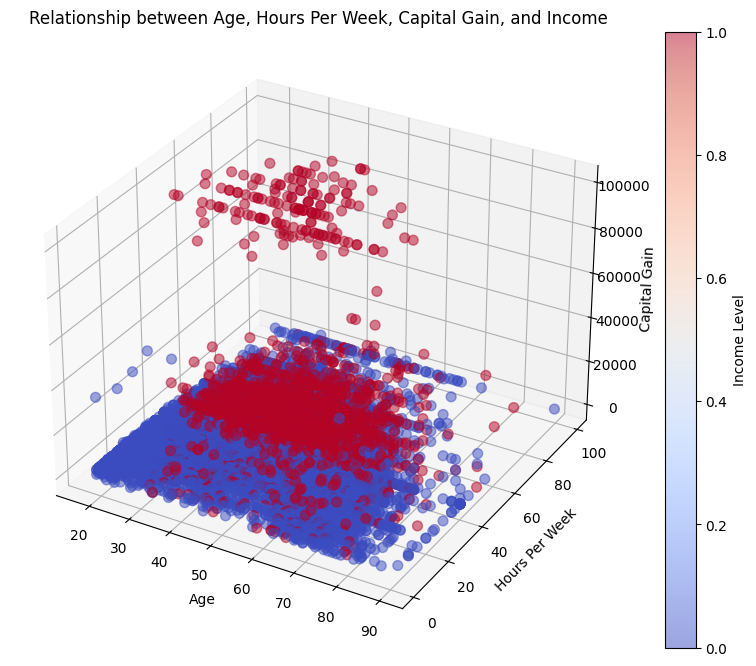

In [12]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot points with income level coloring
ax.scatter(data['age'], data['hours-per-week'],data['capital-gain'], c=data['income'].apply(lambda x: 1 if x == '>50K' else 0),cmap='coolwarm', s=50, alpha=0.5)
# Set labels and title
ax.set_xlabel('Age')
ax.set_ylabel('Hours Per Week')
ax.set_zlabel('Capital Gain')
ax.set_title('Relationship between Age, Hours Per Week, Capital Gain, and Income')
# Add color bar for income levels
cbar = plt.colorbar(ax.scatter([], [], [], c=[], cmap='coolwarm', alpha=0.5))
cbar.set_label('Income Level')
13

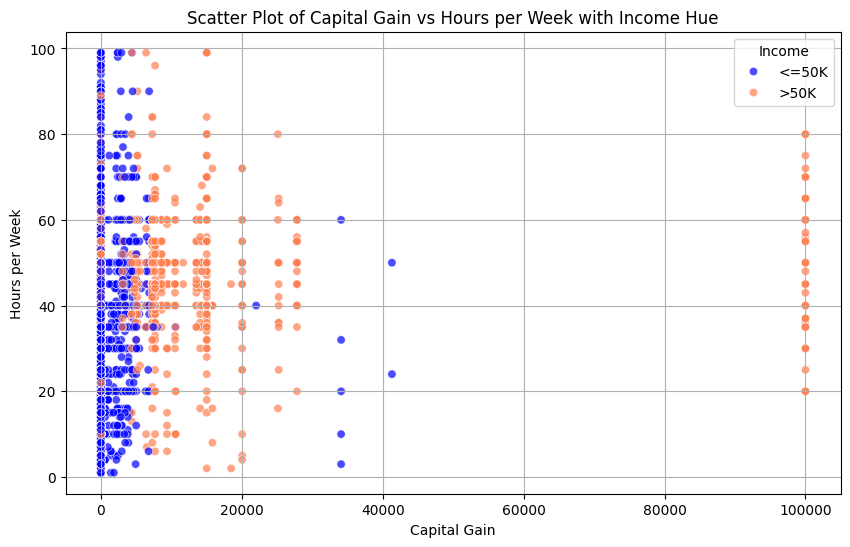

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='capital-gain', y='hours-per-week', hue='income', data=data, palette={'<=50K': 'blue', '>50K': 'coral'}, alpha=0.7)
plt.title('Scatter Plot of Capital Gain vs Hours per Week with Income Hue')
plt.xlabel('Capital Gain')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.grid(True)
plt.show()

## User Story 6: Influence of Work Class and Occupation on Income 

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/1954049951.py:1: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



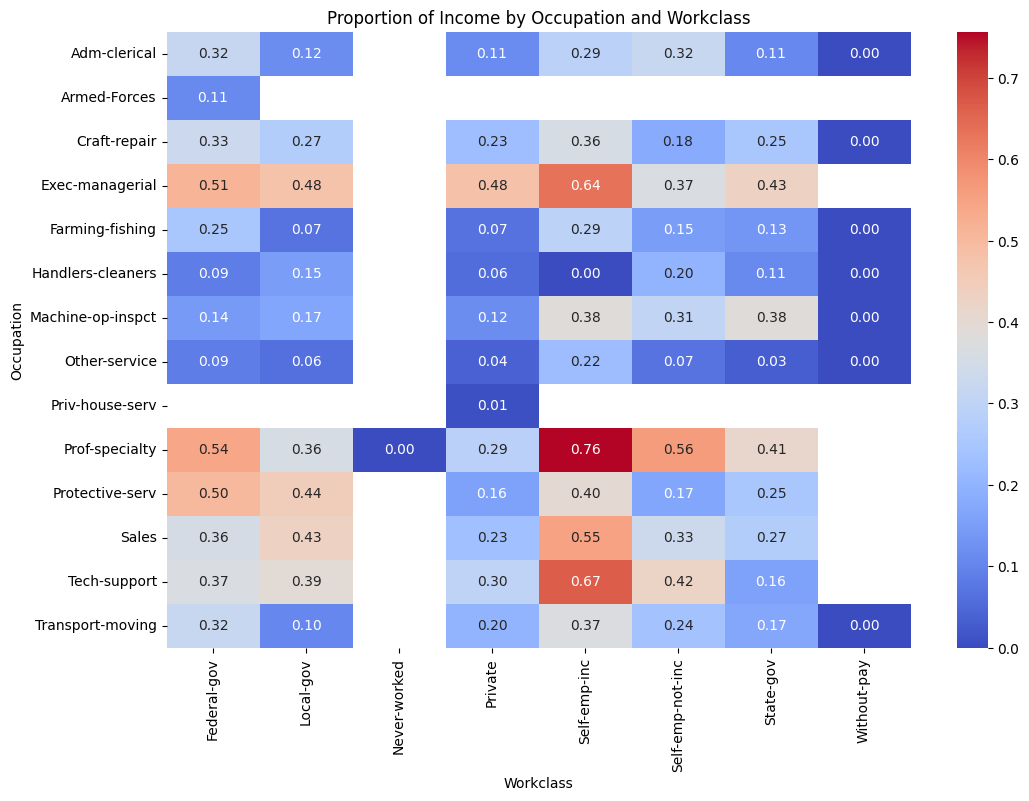

In [14]:
heatmap_data = data.pivot_table(index='occupation', columns='workclass', values='income', aggfunc=lambda x: sum([1 if i == '>50K' else 0 for i in x])/len(x))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Proportion of Income by Occupation and Workclass')
plt.xlabel('Workclass')
plt.ylabel('Occupation')
plt.show()

## Other Graphs-For Understanding Data

### Influence of Occupation on Income

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/2132956854.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



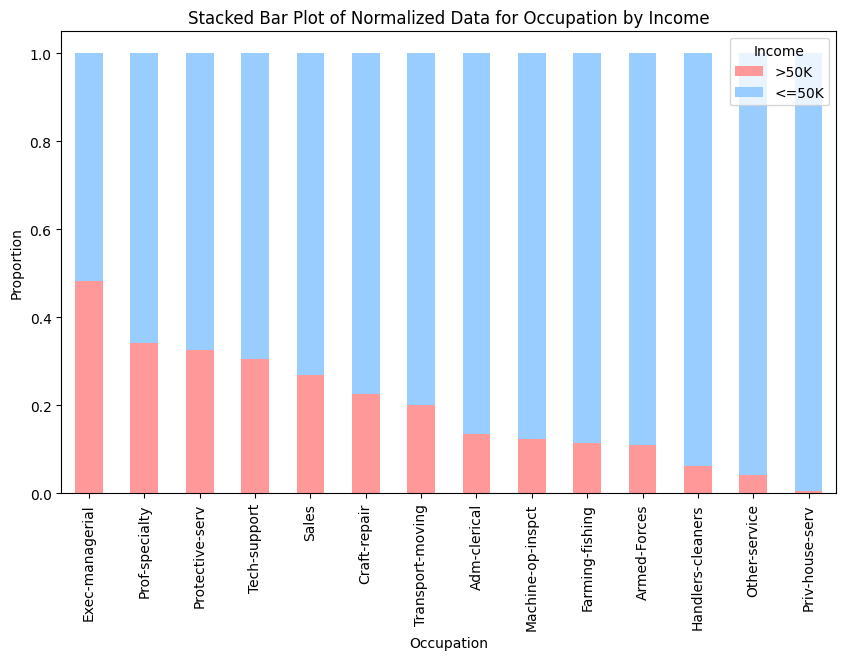

In [15]:
education_income = data.groupby(['occupation', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income = education_income[['>50K', '<=50K']]
education_income['>50K_proportion'] = education_income['>50K']
sorted_countries = education_income.sort_values('>50K_proportion', ascending=False).index
education_income_sorted = education_income.loc[sorted_countries]
education_income_sorted[['>50K', '<=50K']].plot(kind='bar', stacked=True, figsize=(10, 6), color= ['#FF9999', '#99CCFF'])
plt.title('Stacked Bar Plot of Normalized Data for Occupation by Income')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

### Influence of  Hours-per-week on Income

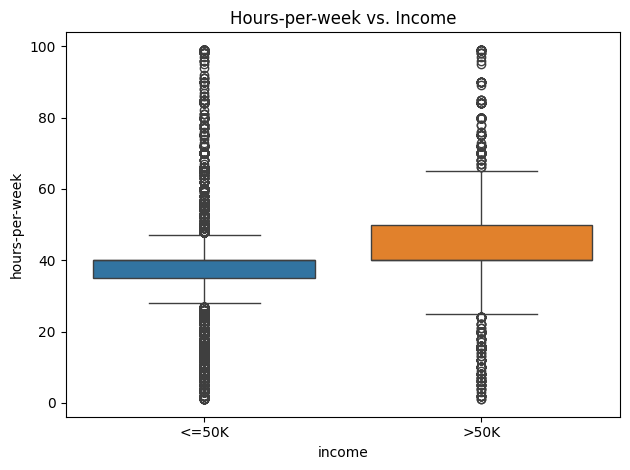

In [16]:
sns.boxplot(x='income', y='hours-per-week', hue='income', data=data)
plt.title('Hours-per-week vs. Income')
plt.tight_layout()
plt.show()

### Influence of Hours Per Week, Capital Gain and Education-num on Income

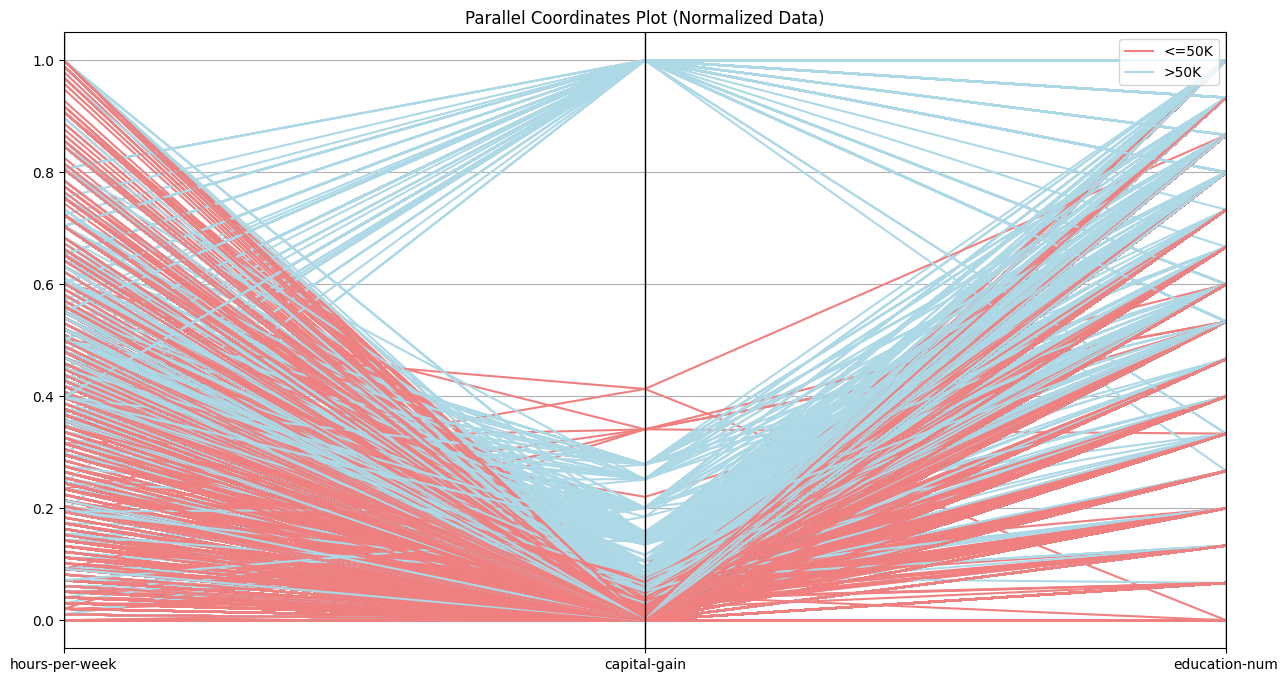

In [17]:

scaler = MinMaxScaler()

# Apply the scaler to the selected numerical columns
numerical_columns = ['age', 'education-num', 'capital-gain', 'hours-per-week']
normalized_data = data.copy()
normalized_data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Encode the 'income' for visualization purposes (to be used as a color or class label in plots)
parallel_data = normalized_data[['hours-per-week', 'capital-gain', 'education-num', 'income']]

# Create a parallel coordinates plot using the normalized data
plt.figure(figsize=(15, 8))
parallel_coordinates(parallel_data, 'income',color={'lightblue', 'lightcoral'})
plt.title('Parallel Coordinates Plot (Normalized Data)')
plt.show()


### Influence of Age and Education on Income

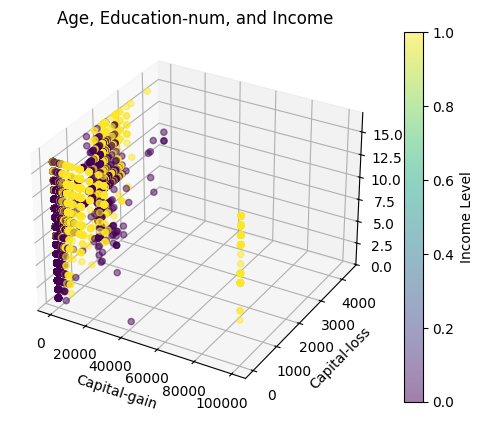

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(data['capital-gain'], data['capital-loss'], data['education-num'], c=data['income'].apply(lambda x: 1 if x == '>50K' else 0),cmap='viridis', alpha=0.5)
ax.set_xlabel('capital-gain'.capitalize())
ax.set_ylabel('capital-loss'.capitalize())
ax.set_zlabel('education-num'.capitalize())
8
plt.title(f'{'age'.capitalize()}, {'education-num'.capitalize()}, and {'income'.capitalize()}')
cbar = plt.colorbar(scatter)
cbar.set_label('Income Level')
plt.show()

### Influence of Education on Income

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/4284405325.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



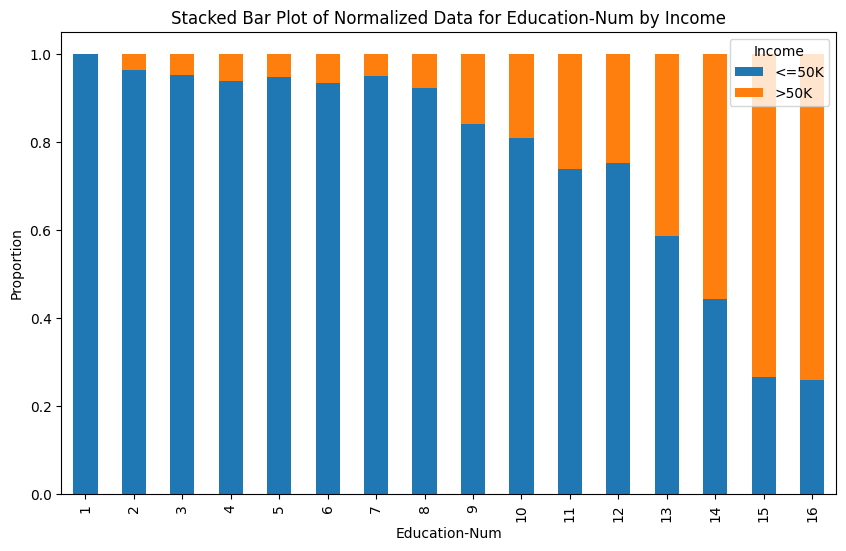

In [19]:
education_income = data.groupby(['education-num', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Plot of Normalized Data for Education-Num by Income')
plt.xlabel('Education-Num')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

### Influence of Race on Income

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/1282070733.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



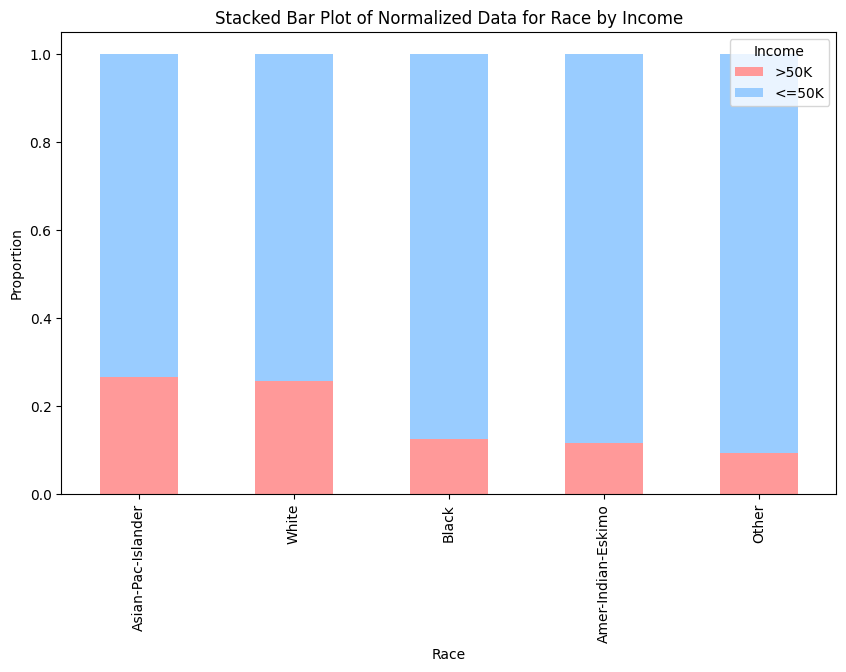

In [20]:
education_income = data.groupby(['race', 'income']).size().unstack().fillna(0)
education_income = education_income.div(education_income.sum(axis=1), axis=0)
education_income = education_income[['>50K', '<=50K']]
education_income['>50K_proportion'] = education_income['>50K']
sorted_countries = education_income.sort_values('>50K_proportion', ascending=False).index
education_income_sorted = education_income.loc[sorted_countries]
education_income_sorted[['>50K', '<=50K']].plot(kind='bar', stacked=True, figsize=(10, 6), color= ['#FF9999', '#99CCFF'])
plt.title('Stacked Bar Plot of Normalized Data for Race by Income')
plt.xlabel('Race')
plt.ylabel('Proportion')
plt.legend(title='Income')
plt.show()

## Prediction Model

In [21]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", 
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", 
           "hours-per-week", "native-country", "income"]
dataset = pd.read_csv(url, names=columns, sep=",\s*", engine='python', na_values="?")
dataset.drop(columns=['fnlwgt'], inplace=True)
dataset.replace('?', np.nan, inplace=True)
for column in dataset.columns:
    most_frequent = dataset[column].mode()[0]
    dataset[column].fillna(most_frequent, inplace=True)
    
label_encoder = LabelEncoder()
for col in categorical_cols:
    dataset[col] = label_encoder.fit_transform(dataset[col])

X = dataset.drop('income', axis=1)
y = dataset['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<>:5: SyntaxWarning:

invalid escape sequence '\s'

<>:5: SyntaxWarning:

invalid escape sequence '\s'

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/4287958992.py:5: SyntaxWarning:

invalid escape sequence '\s'

/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/4287958992.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/6f/df2cny_j5t15dx52zmknk1_h0000gn/T/ipykernel_15128/4287958992.py:10: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through c

### Random Forest Classifier

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

Accuracy: 0.8506064793489944
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4942
        >50K       0.72      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



### Decision Tree

In [23]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_y_pred, target_names=['<=50K', '>50K']))

Decision Tree Accuracy: 0.8200522032857362
              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4942
        >50K       0.62      0.64      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.75      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



### K-Nearest Neighbours

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"KNN Accuracy: {knn_accuracy}")
print(classification_report(y_test, knn_y_pred, target_names=['<=50K', '>50K']))

KNN Accuracy: 0.8415476738830032
              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4942
        >50K       0.69      0.63      0.66      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.84      0.84      6513

